In [2]:
import xarray as xr
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm

In [3]:
era_et = xr.open_dataset('Era_5_Ethiopia_Data.nc')
era_ke = xr.open_dataset('Era_5_Kenya_Data.nc')
era_uk = xr.open_dataset('Era_5_UK_Data.nc')

In [3]:
era_et_point = era_et.isel(expver = 0,latitude = 2,longitude = 3)
era_et_cuttime = era_et_point.sel(time = slice(era_et_point.time[0],era_et_point.time[515]))
era_ke_point = era_ke.isel(expver = 0,latitude = 2,longitude = 3)
era_ke_cuttime = era_ke_point.sel(time = slice(era_ke_point.time[0],era_ke_point.time[515]))
era_uk_point = era_uk.isel(expver = 0,latitude = 2,longitude = 3)
era_uk_cuttime = era_uk_point.sel(time = slice(era_uk_point.time[0],era_uk_point.time[515]))


### Prediction model for Ethiopia

In [4]:
columns = ['u10', 'd2m','t2m','ssr']
index = era_et_cuttime.time.values
ds = pd.DataFrame(index = index, columns = ['u10', 'd2m','t2m','ssr'])
ds['u10'] = era_et_cuttime.u10.values
ds['t2m'] = era_et_cuttime.t2m.values
ds['d2m'] = era_et_cuttime.d2m.values
ds['ssr'] = era_et_cuttime.ssr.values
ds['pev'] = era_et_cuttime.pev.values
X = ds[['u10', 'd2m','t2m','ssr']]
Y = ds['pev']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=36)



In [5]:
#Train(fit) a Linear Regression model
model = LinearRegression()
model.fit(X_train,Y_train)
prediction= model.predict(X_test)


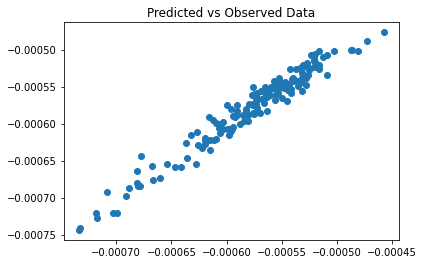

In [6]:
#Plot observed vs predicted data
plt.scatter(Y_test, prediction, label='test_data')

plt.title('Predicted vs Observed Data')
plt.show()




In [7]:
#Perform linear regression tes
model_lin = sm.OLS(prediction, Y_test)
results = model_lin.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.882e+05
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                   7.45e-264
Time:                        18:58:34   Log-Likelihood:                          1541.5
No. Observations:                 155   AIC:                                     -3081.
Df Residuals:                     154   BIC:                                     -3078.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
#Perform correlation between x and y on training data
model_lin2 = sm.OLS(Y_train, X_train)
results = model_lin2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pev   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.097e+05
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:58:34   Log-Likelihood:                          3459.6
No. Observations:                 361   AIC:                                     -6911.
Df Residuals:                     357   BIC:                                     -6896.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
#Calculate Nash–Sutcliffe model efficiency and mean squared error
nse = 1-(np.sum((prediction-Y_test)**2)/np.sum((Y_test-np.mean(Y_test))**2))
mse = mean_squared_error(Y_test, prediction)
print ('NSE: ',nse, 'MSE: ', mse)

NSE:  0.9539561457931995 MSE:  1.3607607e-10


In [10]:
X_train

,u10,d2m,t2m,ssr
1993-03-01 12:00:00,-2.131446,279.419250,300.456909,2528631.500
1987-07-01 12:00:00,0.069872,285.559082,300.943024,1930870.125
1984-03-01 12:00:00,-2.248870,281.558502,301.335327,2439490.500
2019-01-01 12:00:00,-1.979392,278.682739,300.713226,2450366.250
2012-06-01 12:00:00,0.309601,281.094360,301.384399,1851066.000
...,...,...,...,...
2011-07-01 12:00:00,1.549800,283.008789,300.342163,1938688.375
2015-08-01 12:00:00,1.089231,285.791595,300.492706,1937416.125
2003-06-01 12:00:00,0.365795,282.270508,300.837585,1849916.875
1999-11-01 12:00:00,-2.338119,281.099396,297.303070,2044471.375


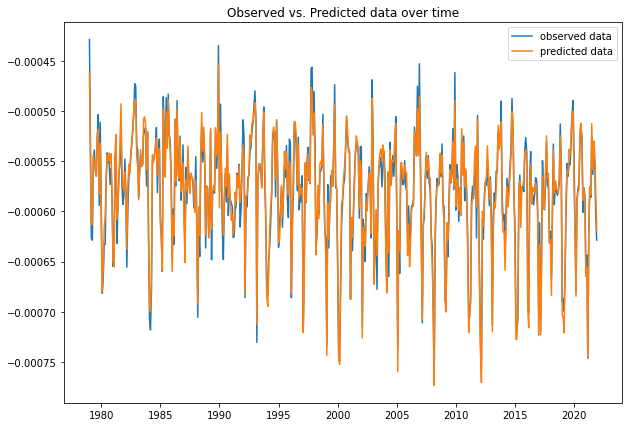

In [11]:
#plot data over full timesteps
prediction_full = model.predict(X)
plt.figure(figsize = (10,7))
plt.plot(Y.index,Y, label = 'observed data')
plt.plot(Y.index,prediction_full,label= 'predicted data')
plt.title('Observed vs. Predicted data over time')
plt.legend()

### Prediction model for Kenya

In [18]:
columns = ['u10', 'd2m','t2m','ssr']
index = era_ke_cuttime.time.values
ds = pd.DataFrame(index = index, columns = ['u10', 'd2m','t2m','ssr'])
ds['u10'] = era_ke_cuttime.u10.values
ds['t2m'] = era_ke_cuttime.t2m.values
ds['d2m'] = era_ke_cuttime.d2m.values
ds['ssr'] = era_ke_cuttime.ssr.values
ds['pev'] = era_ke_cuttime.pev.values
X_ke = ds[['u10', 'd2m','t2m','ssr']]
Y_ke = ds['pev']
prediction_ke= model.predict(X_ke)

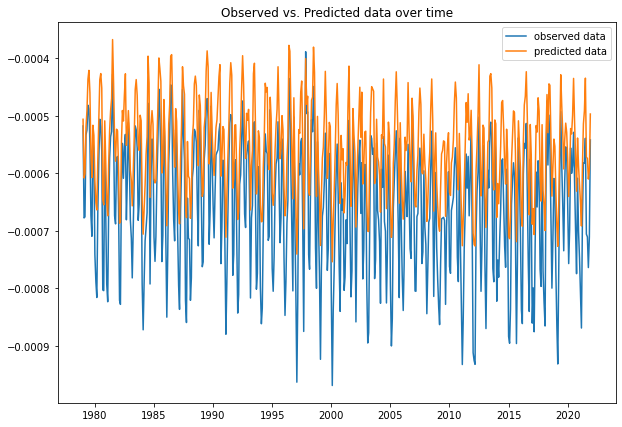

In [19]:
plt.figure(figsize = (10,7))
plt.plot(Y_ke.index,Y_ke, label = 'observed data')
plt.plot(Y_ke.index,prediction_ke,label= 'predicted data')
plt.title('Observed vs. Predicted data over time')
plt.legend()

In [14]:
#Calculate Nash–Sutcliffe model efficiency and mean squared error
nse = 1-(np.sum((prediction_ke-Y_ke)**2)/np.sum((Y_ke-np.mean(Y_ke))**2))
mse = mean_squared_error(Y_ke, prediction_ke)
print ('NSE: ',nse, 'MSE: ', mse)

NSE:  0.03198033571243286 MSE:  1.2775265e-08


In [15]:
#Perform linear regression test
model_lin = sm.OLS(prediction_ke, Y_ke)
results = model_lin.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.153e+05
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        19:01:33   Log-Likelihood:                          4686.6
No. Observations:                 516   AIC:                                     -9371.
Df Residuals:                     515   BIC:                                     -9367.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

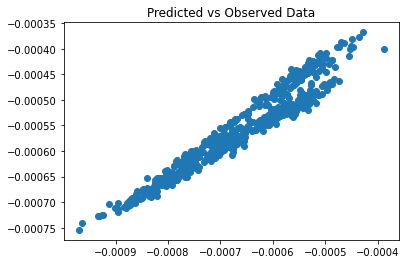

In [16]:
#Plot observed vs predicted data
plt.scatter(Y_ke, prediction_ke, label='test_data')

plt.title('Predicted vs Observed Data')
plt.show()

### Prediction model for UK

In [17]:
columns = ['u10', 'd2m','t2m','ssr']
index = era_uk_cuttime.time.values
ds = pd.DataFrame(index = index, columns = ['u10', 'd2m','t2m','ssr'])
ds['u10'] = era_uk_cuttime.u10.values
ds['t2m'] = era_uk_cuttime.t2m.values
ds['d2m'] = era_uk_cuttime.d2m.values
ds['ssr'] = era_uk_cuttime.ssr.values
ds['pev'] = era_uk_cuttime.pev.values
X_uk = ds[['u10', 'd2m','t2m','ssr']]
Y_uk = ds['pev']
prediction_uk= model.predict(X_uk)

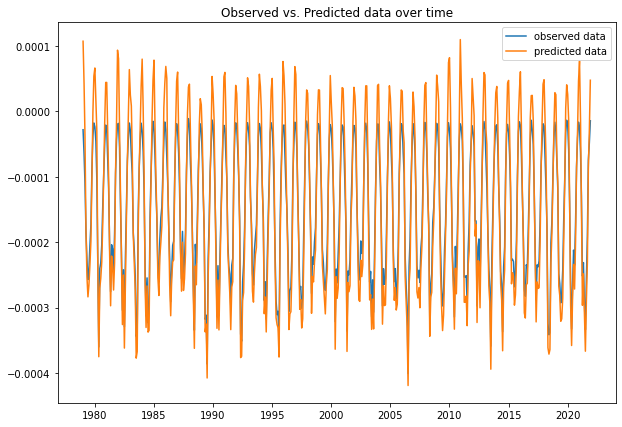

In [20]:
plt.figure(figsize = (10,7))
plt.plot(Y_uk.index,Y_uk, label = 'observed data')
plt.plot(Y_uk.index,prediction_uk,label= 'predicted data')
plt.title('Observed vs. Predicted data over time')
plt.legend()

In [21]:
#Calculate Nash–Sutcliffe model efficiency and mean squared error
nse = 1-(np.sum((prediction_uk-Y_uk)**2)/np.sum((Y_uk-np.mean(Y_uk))**2))
mse = mean_squared_error(Y_uk, prediction_uk)
print ('NSE: ',nse, 'MSE: ', mse)

NSE:  0.8433642387390137 MSE:  1.558377e-09


In [22]:
#Perform linear regression test
model_lin = sm.OLS(prediction_uk, Y_uk)
results = model_lin.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.415e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        19:06:00   Log-Likelihood:                          4534.1
No. Observations:                 516   AIC:                                     -9066.
Df Residuals:                     515   BIC:                                     -9062.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

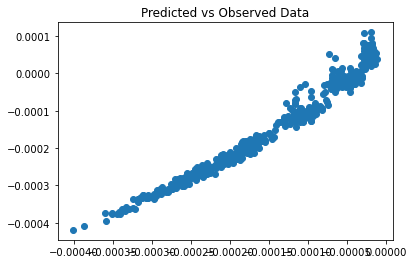

In [23]:
#Plot observed vs predicted data
plt.scatter(Y_uk, prediction_uk, label='test_data')

plt.title('Predicted vs Observed Data')
plt.show()